In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from math import exp
import matplotlib.pyplot as plt
import random



from binaryAdaboost import Adaboost
from decisionstump import DecisionStump
from MultiAdaboost import MultiAdaboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from collections import Counter

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

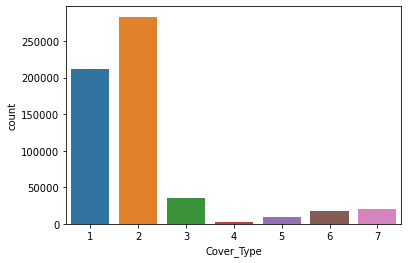

In [2]:
df = pd.read_csv('covtype.csv', sep=',',header=0)

sns.countplot(data=df, x='Cover_Type')
Counter(df.Cover_Type)

In [3]:
df = df.sample(n=20000, random_state=53).reset_index(drop=True)


In [4]:
df.groupby("Cover_Type").mean()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,3129.263904,157.247274,13.068702,269.476009,41.676254,2618.571292,211.856325,223.450382,144.090104,1972.757497,...,0.057797,0.106461,0.083561,0.000273,0.004771,0.000000,0.000000,0.038577,0.038168,0.019629
2,2919.498921,151.739390,13.512794,278.121776,45.384853,2423.210153,213.537869,225.423595,143.492858,2168.264927,...,0.043675,0.103278,0.090433,0.004624,0.000000,0.000206,0.000000,0.002569,0.001336,0.001028
3,2395.512438,178.631841,21.134328,209.039801,64.237977,956.946103,200.689055,215.606136,141.196517,928.989221,...,0.000000,0.004146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2233.100000,129.318182,18.872727,109.127273,44.572727,879.572727,229.300000,215.809091,108.754545,932.027273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2788.872404,136.456973,16.133531,221.207715,51.964392,1346.810089,223.296736,220.504451,123.694362,1618.635015,...,0.023739,0.041543,0.077151,0.002967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2410.516722,185.439799,19.341137,162.118729,46.906355,992.511706,191.091973,208.837793,149.153846,1045.187291,...,0.000000,0.010033,0.030100,0.001672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3363.838710,156.020528,13.862170,382.369501,76.909091,2739.096774,216.469208,222.090909,136.281525,2086.760997,...,0.005865,0.042522,0.030792,0.001466,0.039589,0.002933,0.010264,0.294721,0.259531,0.197947


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           20000 non-null  int64
 1   Aspect                              20000 non-null  int64
 2   Slope                               20000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    20000 non-null  int64
 4   Vertical_Distance_To_Hydrology      20000 non-null  int64
 5   Horizontal_Distance_To_Roadways     20000 non-null  int64
 6   Hillshade_9am                       20000 non-null  int64
 7   Hillshade_Noon                      20000 non-null  int64
 8   Hillshade_3pm                       20000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  20000 non-null  int64
 10  Wilderness_Area1                    20000 non-null  int64
 11  Wilderness_Area2                    20000 non-null  int64
 12  Wild

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3021,301,16,150,60,2841,173,231,198,258,...,0,1,0,0,0,0,0,0,0,2
1,2676,315,8,67,9,1366,198,233,175,313,...,0,0,0,0,0,0,0,0,0,2
2,3040,355,13,60,3,2468,199,218,156,912,...,0,0,0,0,0,0,0,0,0,1
3,2649,31,11,0,0,1129,217,217,134,2028,...,0,0,0,0,0,0,0,0,0,2
4,3333,197,9,30,-1,3241,218,248,164,1992,...,1,0,0,0,0,0,0,0,0,1


In [8]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2958.801500,156.15410,14.069300,268.982750,46.388250,2347.819400,211.826250,223.362500,142.972150,1969.404600,...,0.092000,0.077900,0.002500,0.003100,0.000200,0.000350,0.025450,0.023500,0.014450,2.045150
std,280.256378,112.32745,7.527179,211.357443,58.364607,1568.521321,26.766905,19.851058,38.359574,1313.944895,...,0.289033,0.268021,0.049939,0.055593,0.014141,0.018705,0.157491,0.151489,0.119339,1.389139
min,1882.000000,0.00000,0.000000,0.000000,-139.000000,0.000000,53.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2807.000000,58.00000,9.000000,108.000000,7.000000,1101.000000,198.000000,213.000000,120.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,128.00000,13.000000,228.000000,29.000000,1976.000000,217.000000,226.000000,143.000000,1690.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,263.00000,18.000000,384.000000,69.000000,3333.250000,231.000000,237.000000,169.000000,2538.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.00000,62.000000,1301.000000,544.000000,7068.000000,254.000000,254.000000,254.000000,7126.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


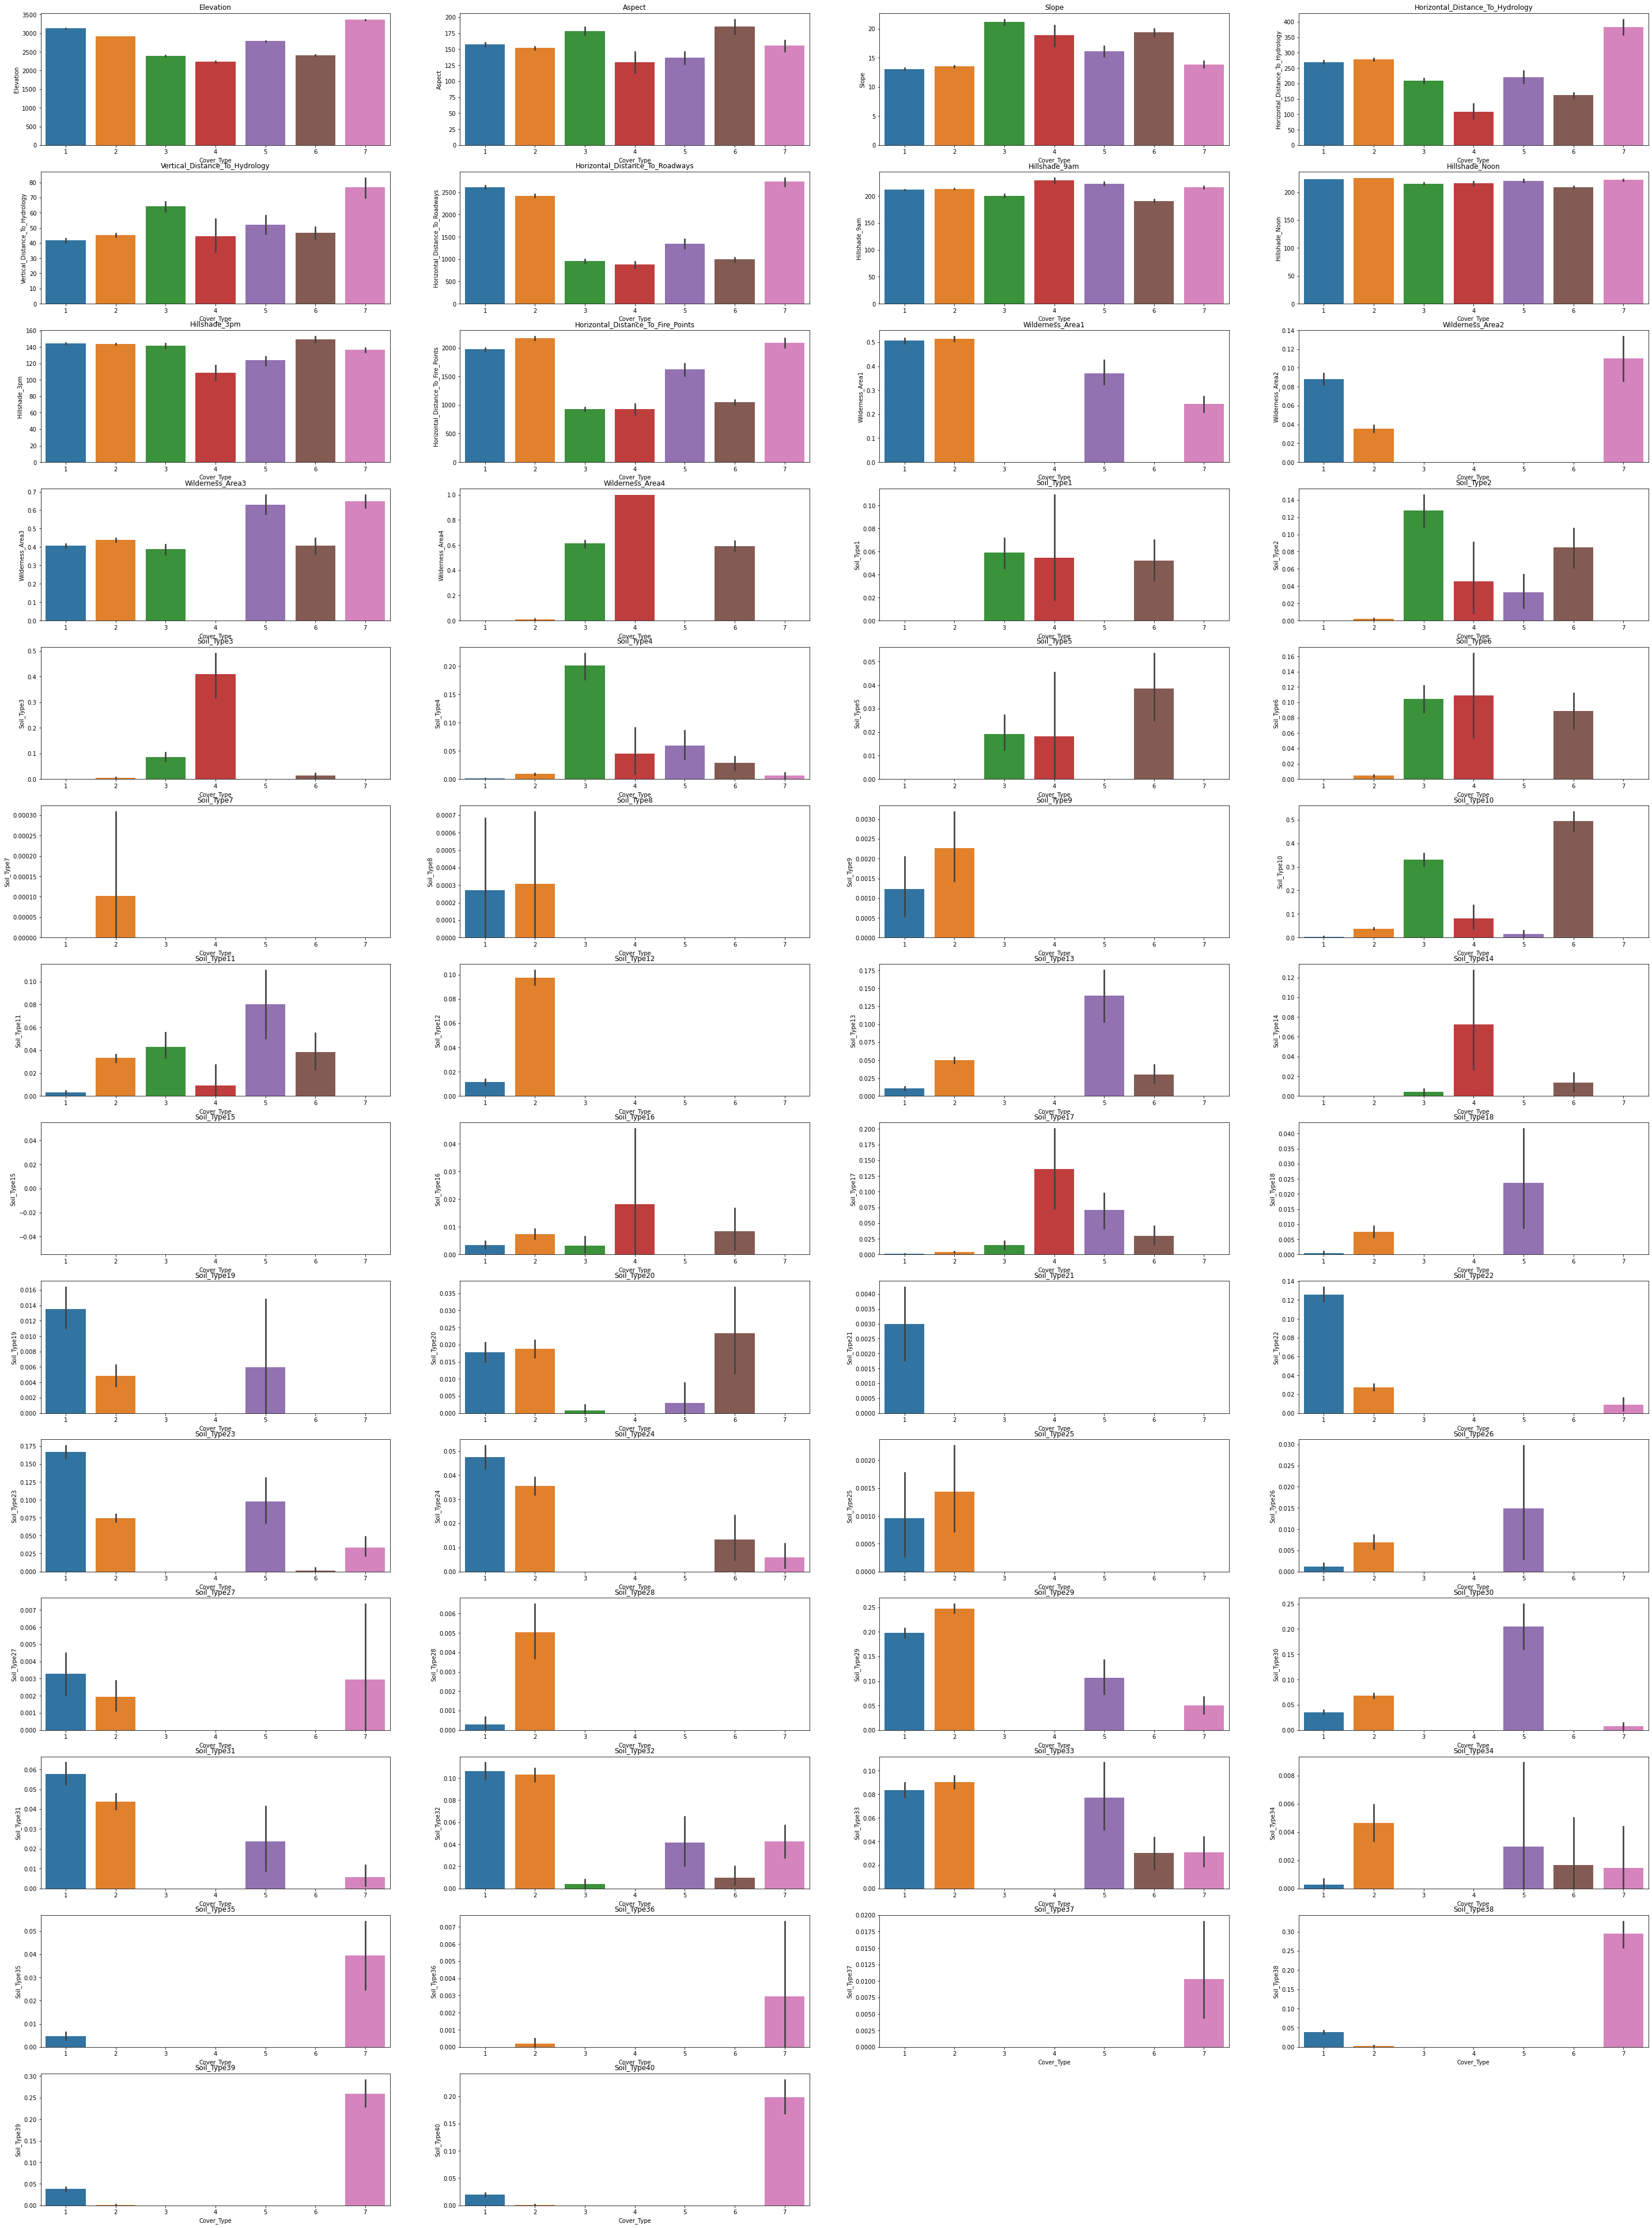

In [9]:
plt.figure(figsize=(50, 70))
for i, col in enumerate(df.iloc[:,0:-1], 1):
    plt.subplot(14, 4, i)
    sns.barplot(df["Cover_Type"], df[col])
    plt.title(col)
    #plt.tight_layout()

plt.show()

In [6]:
columns = list(df.columns)
for colonna in columns[0:-1]:
    if sum(df.groupby("Cover_Type").mean()[colonna]) == 0:
        df = df.drop(columns=[colonna])
        print(colonna)

Soil_Type15


In [7]:
y = df.iloc[:,-1]
df = df.drop(columns=['Cover_Type'])

In [8]:
X = df.to_numpy()

In [9]:
def error(y_predicted, real_labels):            
    predictions = list(y_predicted)
    #real_labels = real_labels.to_numpy()
    return 1 - (np.count_nonzero([0 if element != real_labels[index] else 1 for index, element in enumerate(predictions)]))/len(predictions)


In [20]:
from sklearn.model_selection import KFold

T=200
randomico=False
k_fold = KFold(n_splits=5)
classi = [i for i in range(1,8)]

In [ ]:
tot_training_error = [[] for x in range(7)]
tot_test_error = [[] for x in range(7)]

multi_training_error, multi_test_error = [], []
for train, test in k_fold.split(df, y):
    print('------------------------FOLD ---------------------------------------')
    training_labels = y.loc[train].copy()
    test_labels = y.loc[test].copy()
    
    X_train = (df.loc[train]).to_numpy()
    X_test = (df.loc[test]).to_numpy()
    
    multiada = MultiAdaboost(T, classi)
    predittori_binari = multiada.fit(X_train,training_labels,rand=randomico)
    
    training_pred_at_t = [[] for x in range(T)]
    test_pred_at_t = [[] for x in range(T)]
    for classe in classi:
        ada, pesi= predittori_binari[classe-1][0],predittori_binari[classe-1][1]
        bin_ada = Adaboost(T)
        train_all_vs_one = np.array([1 if v == classe else -1 for v in training_labels ])
        test_all_vs_one = np.array([1 if v == classe else -1 for v in test_labels ])
        
        training_errors, test_errors = [], []        
        for i in range(1,T+1):
            y_pred = bin_ada.predict(X_train, clfs=ada[0:i], ls_w_i=pesi[0:i])
            training_errors.append(error(y_pred, train_all_vs_one))
            
            test_y_pred = bin_ada.predict(X_test, clfs=ada[0:i], ls_w_i=pesi[0:i])
            test_errors.append(error(test_y_pred, test_all_vs_one))
                               
            training_pred_at_t[i-1].append(bin_ada.predict(X_train, clfs=ada[0:i], ls_w_i=pesi[0:i]))
            test_pred_at_t[i-1].append(bin_ada.predict(X_test, clfs=ada[0:i], ls_w_i=pesi[0:i]))
        
        tot_training_error[classe-1].append(training_errors)
        tot_test_error[classe-1].append(test_errors)
        
    k_error_test, k_error_train= [], []    
    for i in range(0,T):
        train_multi_pred = multiada.predict(training_pred_at_t[i])
        k_error_train.append(error(train_multi_pred, np.array(training_labels)))
       
        
        test_multi_pred = multiada.predict(test_pred_at_t[i])
        k_error_test.append(error(test_multi_pred, np.array(test_labels)))
       
        
    multi_training_error.append(np.array(k_error_train))
    multi_test_error.append(np.array(k_error_test))
   

------------------------FOLD ---------------------------------------
Counter({-1: 10155, 1: 5845})


Text(0.5, 1.0, 'Multi prediction Error')

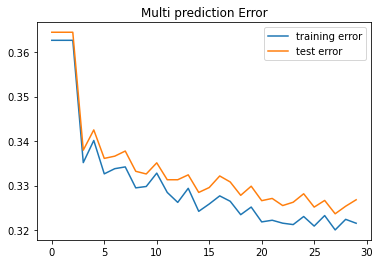

In [17]:
plt.plot(np.mean(multi_training_error, axis=0), label='training error')
plt.plot(np.mean(multi_test_error, axis=0), label='test error')
plt.legend()
plt.title('Multi prediction Error')



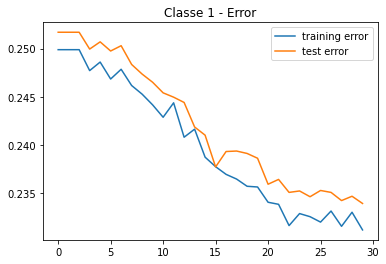

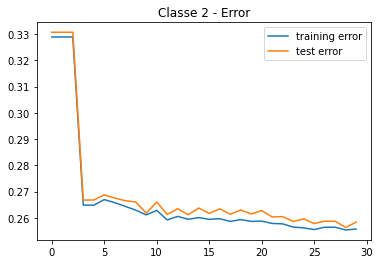

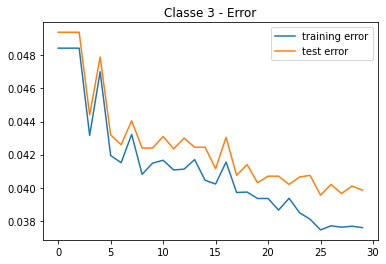

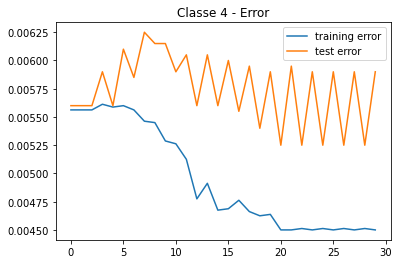

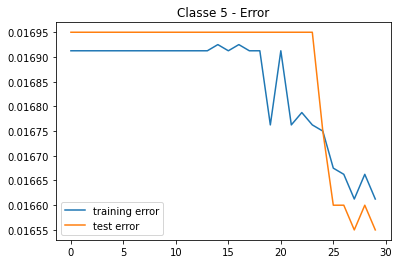

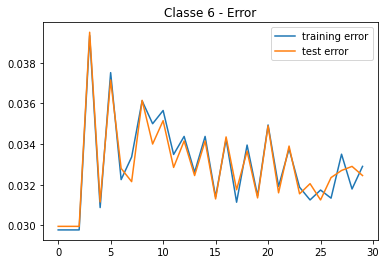

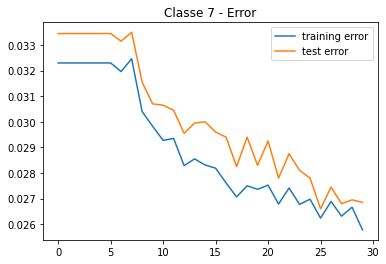

In [19]:
for classe in range(0,7):
    media_train = np.mean(tot_training_error[classe], axis=0)
    media_test = np.mean(tot_test_error[classe], axis=0)
    
    plt.plot(media_train, label='training error')
    plt.plot(media_test, label='test error')
    plt.legend()
    plt.title('Classe {} - Error'.format(classe+1))
    plt.show()
   